Group XX (Name 1, Name 2, Name 3, Name 4)

# Homework 6

This homework revolves all around eigenvalues, eigenvectors, and corresponding matrix decompositions.
Let's start with intialization as usual:

In [1]:
import numpy as np                # basic arrays, vectors, matrices
import scipy as sp                # matrix linear algebra 

import matplotlib                 # plotting
import matplotlib.pyplot as plt   # plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

<div class="alert alert-info">

### Power Iteration to Compute the Largest Eigenpair
</div>

In the course, we discussed briefly several methods to compute eigenvalues of a matrix $A$. Among these, the *Power Iteration* is the simplest. However, it is a good illustration of the general idea behind eigenvalue algorithms. It calculates the largest eigenvalue and the corresponding eigenvector in an iterative manner by repeated application of $A$ to a vector $\mathbf{b}$.

<div class="alert alert-success">

**Task**: Complete the function `power_iteration` below to implement the power iteration algorithm to compute the largest eigenpair, given the square matrix `A`. The function should have the following properties:

- It should return the sequence of $\mu_k$ and $\mathbf{b}$, where $\mu_k$ is the Rayleigh coefficient obtained in the $k$-th iteration (This is used for visual verification in the code below the function by plotting the $\mu_k$). The other output $\mathbf{b}$ is the approximation of the eigenvector.
- `power_iteration` should terminate if either the maximum number of iterations (`maxiter`) is reached, or if $(\mu_k,b_k)$ is (numerically) an eigenpair, i.e. $Ab_k$ and $\mu_k b_k$ are close. You may use [`numpy.allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) to check this.
</div>

largest eigenvalue = 18.000042482719838 (15 iterations)
corresponding eigenvector =  [0.13636443 0.45454462 0.40909095]


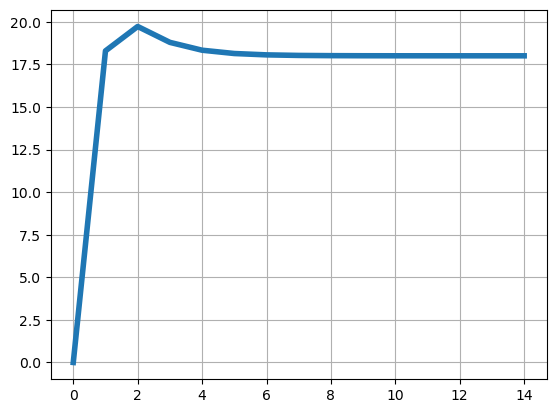

In [2]:
def power_iteration(A, maxiter = 50):
    """perform power iteration on A and return the sequence of Rayleigh coefficients"""
    # TODO 
    n = len(A)
    b = np.random.rand(n)
    mu = np.zeros(1)

    for i in range(maxiter):        
        
        #Algorithmus
        Mul = np.matmul(A, b)
        mu_i = (b.T@Mul)/(b.T@b)
        
        #mu in Vektor hinzufügeh
        mu = np.append(mu, mu_i)
        
        b = Mul/sum(np.sqrt(Mul**2))
        
        #Break wenn close    
        x = np.allclose(Mul, mu[i]*b) 
        
        if x == True:
            break

        
    return mu,b    
    
    
        
    return mu,b

# test power iteration (largest eigenvalue of A = 18)
A = np.array([[9, 0, 3], [4, 6, 12], [15, 9, 3]])

mu, b = power_iteration(A)

print( "largest eigenvalue =", mu[len(mu)-1], "(%d iterations)"%len(mu) )
print( "corresponding eigenvector = ",b)
# visualize the convergence of the Rayleigh coefficients

fig = plt.plot( mu,linewidth=4.0)
plt.grid()

If the algorithm is correct, it should return the maximum eigenvalue of $A$.

Let's inspect convergence by plotting $\Delta_k = |\mu_{k+1} - \mu_k|$, i.e. the order of magnitude of successive updates, in a logarithmic plot.

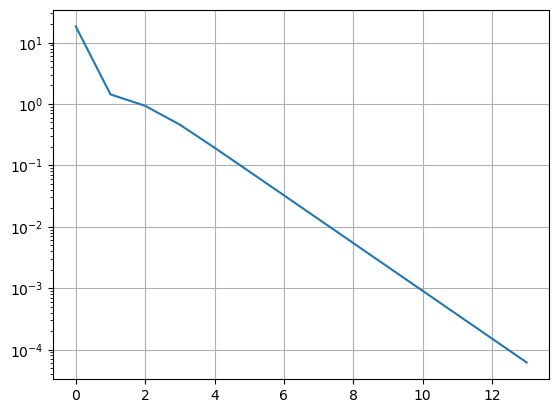

In [3]:
def plot_convergence(ax, mu):
    delta = np.abs(mu[1:]-mu[:-1])
    ax.plot(delta)
    ax.set_yscale('log')
    ax.grid(True)
    
plot_convergence(plt.gca(), mu)

<div class="alert alert-success">

**Task**: visualize and compare the convergence for the following three matrices:

$$A_1 = \mathrm{diag}(10,2,1), \ A_2 = \mathrm{diag}(10,8,1),\ A_3 = \mathrm{diag}(10,9.9,1).$$

What is the explanation for the drastically differing convergence behavior?
</div>

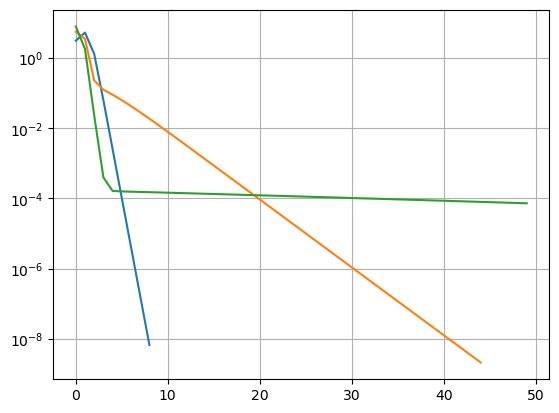

In [4]:
# TO DO

A1 = np.array([[10, 0, 0], [0, 2, 0], [0, 0, 1]])
A2 = np.array([[10, 0, 0], [0, 8, 0], [0, 0, 1]])
A3 = np.array([[10, 0, 0], [0, 9.9, 0], [0, 0, 1]])

mu1, b1 = power_iteration(A1)
mu2, b2 = power_iteration(A2)
mu3, b3 = power_iteration(A3)

plot_convergence(plt.gca(), mu1) #blau
plot_convergence(plt.gca(), mu2) #orange
plot_convergence(plt.gca(), mu3) #grün

<div class="alert alert-info">

### QR Decomposition using the Householder Transformations
</div>

In the exercise 5, we have seen the QR decomposition of a matrix using the Gram-Schmidt process. In this exercise, the task is to implement it using the more stable Householder transformations. 

<div class="alert alert-success">

**Task**: Complete the function `QR_decomposition_Householder` below to implement the QR decomposition of the given square matrix `A`. The function should simply return the $Q$ and $R$ matrices as outputs. 
</div>

In [5]:
def QR_decomposition_Householder(A):
   
    # TODO 
    
    n = len(A)
    I = np.eye(n)
    Q = np.eye(n)
    R = A.copy()

    for i in range(n-1):
        
        
        H = np.eye(n)
            
        z = np.zeros(n-i)
        z[0] = 1

        #Vektor v ausrechnen
        v = R[i:,i] + np.linalg.norm(R[i:, i]) * z 

        #Vektor v normieren --> Vektor u
        u = v / np.linalg.norm(v)

        #Householder matrix ausrechnen
        H[i:, i:] = I[i:, i:] - 2 * np.outer(u, np.transpose(u)) 

        Q = Q@H
        R = H@R    

    return Q,R

In below, we can check the correctness of the implementation on a test matrix using the identities $A = QR$ and $Q^\top Q = I$

In [6]:
A = np.random.rand(4,4)
Q,R = QR_decomposition_Householder(A)
Acheck = Q@R
print(A-Acheck)
Icheck = np.transpose(Q)@Q
print(Icheck)

[[ 0.00000000e+00 -1.11022302e-16 -1.11022302e-16  3.80771803e-16]
 [ 0.00000000e+00 -2.77555756e-16  0.00000000e+00 -2.77555756e-16]
 [ 0.00000000e+00 -4.44089210e-16 -1.66533454e-16 -4.44089210e-16]
 [ 1.11022302e-16 -1.11022302e-16 -1.73472348e-18 -1.11022302e-16]]
[[ 1.00000000e+00  2.14865517e-17 -5.33916195e-17 -4.10090392e-17]
 [ 2.14865517e-17  1.00000000e+00 -4.52080194e-17  2.23628683e-16]
 [-5.33916195e-17 -4.52080194e-17  1.00000000e+00 -1.80451365e-16]
 [-4.10090392e-17  2.23628683e-16 -1.80451365e-16  1.00000000e+00]]


<div class="alert alert-info">

### Computing Eigenvalues using the QR Algorithm
</div>

<div class="alert alert-success">

**Task**: Complete the function `compute_eigenvalues`, which computes the eigenvalues of the square matrix $A$ using the QR algorithm. The function should return the vector of eigenvalues as the output. 
</div>

In [ ]:
def compute_eigenvalues(A):
   
    # TODO 
    

    
    
    return eigvals

Now we can check the implementation on a random matrix $A$, which has real eigenvalues. We can easily generate such a matrix using the diagonalization
\begin{equation}
A = S \Lambda S^{-1}
\end{equation}
We first generate a diagonal matrix 

In [ ]:
N = 6
Lambda = np.diag(np.random.rand(N)*10)
print(Lambda)


Now we generate a square random $S$ matrix. Note that this matrix will be invertible with almost certain probability. Using $S$ and $\Lambda$, we can generate a random matrix with real eigenvalues to test the implementation

In [ ]:
S = np.random.random((N,N))
Sinv = np.linalg.inv(S)
A = S@Lambda@Sinv
print(A)

The eigenvalues of $A$ can be easily found by using the `numpy.linalg.eigvals` function:

In [ ]:
eigenvaluesOfA = np.linalg.eigvals(A)
print(eigenvaluesOfA)

Now we are ready to use 'compute_eigenvalues'. If the implementation is correct, it should return exactly the same values as above.

In [ ]:
eigenvaluesOfA = compute_eigenvalues(A)
print(eigenvaluesOfA)